# 1. Dự đoán điểm số (Ratings Prediction)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu
data = pd.read_csv('cleaned_hospitals.csv')

# Chuẩn bị dữ liệu
X = data.drop(columns=['Rating_Overall'])
y = data['Rating_Overall']

# Đảm bảo tất cả các giá trị là số
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Xây dựng mô hình
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Định nghĩa hình dạng đầu vào
    layers.Dense(128, activation='relu'),       # Tăng số lượng nơ-ron
    layers.Dropout(0.2),                        # Thêm lớp Dropout để giảm thiểu overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Đầu ra là một số thực
])

# Biên dịch mô hình
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Điều chỉnh learning rate
              loss='mean_squared_error',
              metrics=['mae'])  # Thêm metric MAE để theo dõi trong quá trình huấn luyện

# Thêm callback để lưu mô hình tốt nhất
model_checkpoint = callbacks.ModelCheckpoint(
    'best_rating_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2,
                    callbacks=[model_checkpoint], verbose=1)

# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')

# Lưu mô hình cuối cùng
model.save('final_rating_prediction.keras')


Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3.6399 - mae: 1.5193 - val_loss: 0.9690 - val_mae: 0.7702
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0127 - mae: 0.7782 - val_loss: 0.8616 - val_mae: 0.6960
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8639 - mae: 0.6998 - val_loss: 0.7669 - val_mae: 0.6691
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7939 - mae: 0.6703 - val_loss: 0.7273 - val_mae: 0.6474
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7263 - mae: 0.6425 - val_loss: 0.6889 - val_mae: 0.6304
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6804 - mae: 0.6220 - val_loss: 0.6312 - val_mae: 0.5814
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6387 - mae: 0.5971 - val_loss: 0.5902 - val_mae: 0.5544
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6223 - mae: 0.5806 - val_loss: 0.5569 - val_mae: 0.5483
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.573

# 2. Phân loại (Classification)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Đọc dữ liệu
data = pd.read_csv('cleaned_hospitals.csv')

# Chuẩn bị dữ liệu
X = data.drop(columns=['Rating_Overall'])
y = (data['Rating_Overall'] > 3).astype(int)  # Phân loại tốt (1) và kém (0)

# Chuyển đổi dữ liệu sang kiểu số (numeric) và xử lý giá trị thiếu
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)  # Thay thế NaN bằng giá trị trung bình của từng cột

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Lớp đầu vào
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Thêm Dropout để giảm overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),  # Thêm Dropout
    layers.Dense(1, activation='sigmoid')  # Đầu ra nhị phân
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Cài đặt EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss:.4f}, Model Accuracy: {accuracy:.4f}')

# Lưu mô hình
model.save('classification_model.keras')


Epoch 1/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7230 - loss: 0.6885 - val_accuracy: 0.7134 - val_loss: 0.6757
Epoch 2/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7070 - loss: 0.6726 - val_accuracy: 0.7134 - val_loss: 0.6608
Epoch 3/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7088 - loss: 0.6586 - val_accuracy: 0.7134 - val_loss: 0.6484
Epoch 4/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7048 - loss: 0.6477 - val_accuracy: 0.7134 - val_loss: 0.6380
Epoch 5/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7174 - loss: 0.6344 - val_accuracy: 0.7134 - val_loss: 0.6296
Epoch 6/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - loss: 0.6283 - val_accuracy: 0.7134 - val_loss: 0.6229
Epoch 7/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7060 - loss: 0.6249 - val_accuracy: 0.7134 - val_loss: 0.6175
Epoch 8/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7072 - loss: 0.6194 - val_accuracy: 0.7134 - v

# 3. Nhận dạng mẫu (Pattern Recognition)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu
data = pd.read_csv('cleaned_hospitals.csv')

# Kiểm tra các giá trị null
if data.isnull().sum().any():
    raise ValueError("Dữ liệu chứa giá trị null, vui lòng xử lý trước khi tiếp tục.")

# Chuẩn bị dữ liệu
X = data.drop(columns=['Rating_Readmission'])
y = data['Rating_Readmission']

# Tách thành các loại dữ liệu
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Tạo biến chuyển đổi
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Kết hợp các biến chuyển đổi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi dữ liệu đầu vào qua preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Xác định số lượng đầu vào cho mô hình
input_shape = X_train_processed.shape[1]  # Số lượng đặc trưng sau khi mã hóa

# Xây dựng mô hình
model = keras.Sequential([
    layers.Input(shape=(input_shape,)),  # Số lượng đặc trưng
    layers.Dense(128, activation='relu'),  # Tăng số nơ-ron
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Đầu ra là một số thực
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.MeanAbsoluteError()])

# Thiết lập callback để lưu mô hình tốt nhất
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Huấn luyện mô hình
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[checkpoint_callback])

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test_processed)

# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.2205 - mean_absolute_error: 0.8350 - val_loss: 0.4347 - val_mean_absolute_error: 0.5077
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3843 - mean_absolute_error: 0.4724 - val_loss: 0.4664 - val_mean_absolute_error: 0.5407
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2096 - mean_absolute_error: 0.3343 - val_loss: 0.4659 - val_mean_absolute_error: 0.5155
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0717 - mean_absolute_error: 0.1869 - val_loss: 0.5039 - val_mean_absolute_error: 0.5675
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0465 - mean_absolute_error: 0.1526 - val_loss: 0.4399 - val_mean_absolute_error: 0.5059
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0236 - mean_absolute_error: 0.1062 - val_loss: 0.4255 - val_mean_absolute_error: 0.4953
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0129 - mean_absolute_error: 0.0801 - v

# 4. Phân tích cụm (Clustering)

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.exceptions import NotFittedError
import joblib
import numpy as np
import os

def load_data(file_path):
    """Load data from a CSV file."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Tệp {file_path} không tồn tại.")
    return pd.read_csv(file_path)

def preprocess_data(data):
    """Select numeric columns and scale the data."""
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_columns) == 0:
        raise ValueError("Dữ liệu không có cột số nào để phân cụm.")
    return data[numeric_columns]

def perform_clustering(X, n_clusters=3):
    """Perform KMeans clustering."""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    return clusters, kmeans

def save_model(model, file_path):
    """Save the trained model."""
    joblib.dump(model, file_path)

def save_results(data, file_path):
    """Save the DataFrame with clusters to a CSV file."""
    data.to_csv(file_path, index=False)

def main():
    """Main function to run the clustering process."""
    input_file = 'cleaned_hospitals.csv'
    output_file = 'clustered_hospitals.csv'
    model_file = 'kmeans_model.joblib'
    
    try:
        data = load_data(input_file)
        X = preprocess_data(data)
        
        # Chọn số lượng cụm, có thể thay đổi
        n_clusters = 3
        
        clusters, kmeans = perform_clustering(X, n_clusters)
        
        # Gán nhãn cụm vào DataFrame gốc
        data['Cluster'] = clusters
        
        # Lưu mô hình KMeans
        save_model(kmeans, model_file)
        
        # Lưu DataFrame với nhãn cụm
        save_results(data, output_file)

        print("Phân cụm hoàn tất và mô hình đã được lưu.")
    except (FileNotFoundError, ValueError) as e:
        print(f"Lỗi: {e}")

if __name__ == "__main__":
    main()


Phân cụm hoàn tất và mô hình đã được lưu.


# 5. Dự đoán chi phí (Cost Prediction)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Facility_Name                    4772 non-null   object
 1   Facility_City                    4772 non-null   object
 2   Facility_State                   4772 non-null   object
 3   Facility_Type                    4772 non-null   object
 4   Rating_Overall                   4772 non-null   int64 
 5   Rating_Mortality                 4772 non-null   int64 
 6   Rating_Safety                    4772 non-null   int64 
 7   Rating_Readmission               4772 non-null   int64 
 8   Rating_Experience                4772 non-null   int64 
 9   Rating_Effectiveness             4772 non-null   int64 
 10  Rating_Timeliness                4772 non-null   int64 
 11  Rating_Imaging                   4772 non-null   int64 
 12  Procedure_Heart_Attack_Cost      4

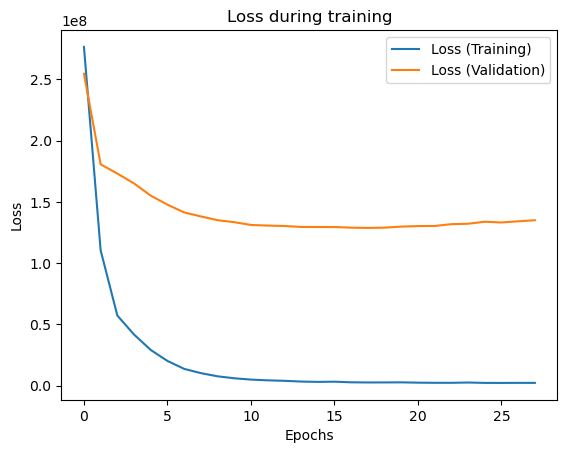

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu
data = pd.read_csv('cleaned_hospitals.csv')

# Kiểm tra kiểu dữ liệu và thông tin tổng quan về dữ liệu
print(data.info())
print(data.describe())

# Chọn cột để dự đoán và loại bỏ cột không cần thiết
X = data.drop(columns=['Procedure_Heart_Attack_Cost'])
y = data['Procedure_Heart_Attack_Cost']

# Chuyển đổi cột object và bool thành số (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Chuyển đổi cột y thành số (nếu chưa)
y = pd.to_numeric(y, errors='coerce')

# Xóa các hàng có giá trị NaN trong y và X
X = X[y.notna()]
y = y.dropna()

# Kiểm tra lại sau khi loại bỏ NaN
if X.empty or y.empty:
    raise ValueError("Dữ liệu không đủ sau khi loại bỏ NaN!")

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kiểm tra lại kiểu dữ liệu
print("Kiểu dữ liệu của X_train:", X_train.dtype)
print("Kiểu dữ liệu của y_train:", y_train.dtype)

# Xây dựng mô hình
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer để giảm overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Đầu ra là một số thực (chi phí)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình với EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá mô hình trên tập kiểm tra
test_loss = model.evaluate(X_test, y_test)
print(f'Model Test Loss: {test_loss}')

# Lưu mô hình
model.save('cost_prediction.keras')

# Vẽ biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
